# Lấy dữ liệu

In [24]:
%store -r X
%store -r y
%store -r X_test
%store -r y_test
%store -r feature_names

# Thay đổi dữ liệu để phù hợp

In [26]:
from sklearn.model_selection import train_test_split
# Chia dữ liệu thành training set và validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Kiểm tra kích thước của các tập dữ liệu
print("Kích thước của tập huấn luyện:", X_train.shape, y_train.shape)
print("Kích thước của tập xác thực:", X_val.shape, y_val.shape)

Kích thước của tập huấn luyện: (10532, 20, 128) (10532,)
Kích thước của tập xác thực: (2634, 20, 128) (2634,)


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression

# Reshape data
# Data ban đầu X(13166, 20, 128), y(13166)

# Reshape X về dạng 2d => X_2d(263320, 128), giữ nguyên 128 và đó là các đặc trưng
X_2d = X_train.reshape(-1, X.shape[-1])
# Reshape y thành y_reshaped(263320) bằng cách lặp mỗi phần tử trong y 20 lần
y_reshaped = np.repeat(y_train, 20)

# Dùng hàm mutual_info_regression
# để đánh giá điểm cho các feature

In [28]:
# Compute information gain for each feature
info_gain = mutual_info_regression(X_2d, y_reshaped)

# Sắp xếp và lấy index của top k phần tử tốt nhất

In [29]:
# Sort the features based on information gain in descending order
sorted_features_indices = np.argsort(info_gain)[::-1]

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a dictionary of feature importance scores
feature_scores = {}
for i in range(len(feature_names)):
    feature_scores[feature_names[i]] = info_gain[i]


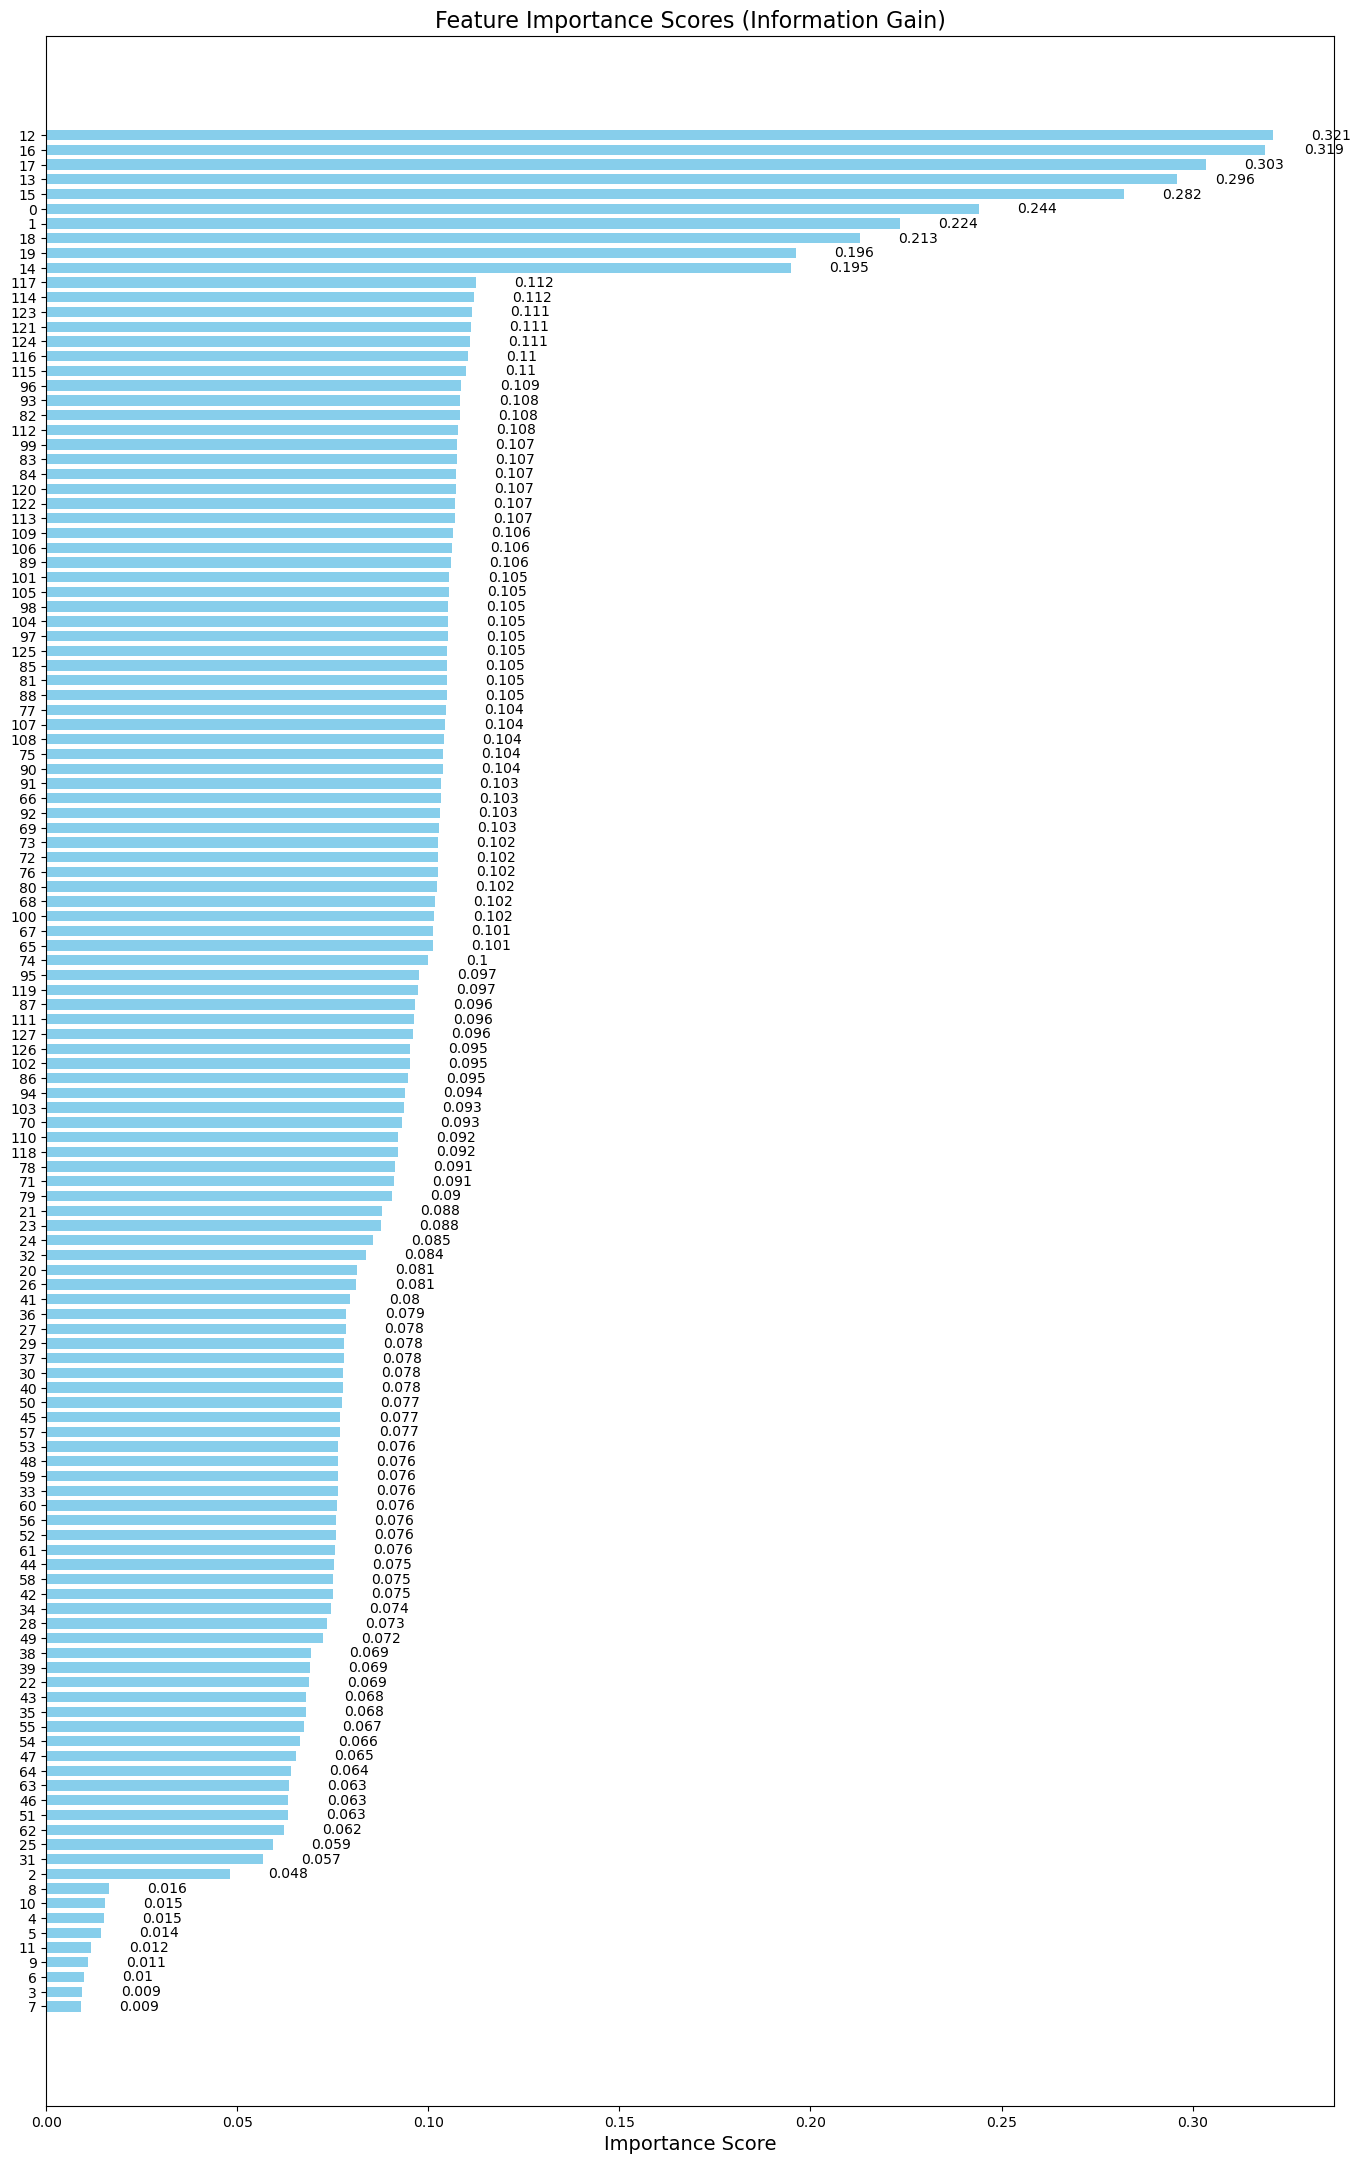

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the features by importance score in descending order
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

# Plot a horizontal bar chart of the feature importance scores
fig, ax = plt.subplots(figsize=(14, 22))  # Increase figure size for more space
y_pos = np.arange(len(sorted_features))
bar_height = 0.7  # Increase bar height for more space between bars
ax.barh(y_pos, [score for feature, score in sorted_features], align="center", color='skyblue', height=bar_height)
ax.set_yticks(y_pos)
ax.set_yticklabels([feature for feature, score in sorted_features], fontsize=10)  # Reduce font size if necessary
ax.invert_yaxis()  # Labels read top-to-bottom
ax.set_xlabel("Importance Score", fontsize=14)
ax.set_title("Feature Importance Scores (Information Gain)", fontsize=16)

# Add importance scores as labels on the horizontal bar chart
for i, v in enumerate([score for feature, score in sorted_features]):
    ax.text(v + 0.01, i, str(round(v, 3)), color="black", fontweight="normal", fontsize=10, verticalalignment='center')  # Adjust position and alignment

plt.tight_layout(pad=2.0)  # Add padding for better layout
plt.show()


In [43]:
# Select the top k features (adjust k as needed)
k = 16
selected_features_indices = sorted_features_indices[:k]
selected_X = X_train[:,:,selected_features_indices]
selected_X_test = X_test[:,:,selected_features_indices]
selected_X_val = X_val[:,:,selected_features_indices]

In [33]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Khởi tạo mô hình
model = keras.Sequential()

# Thêm lớp Convolutional Layer với 32 bộ lọc kích thước 5x5 và hàm kích hoạt ReLU
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(20, k, 1), padding='same'))

# Thêm lớp Convolutional Layer với 32 bộ lọc kích thước 5x5 và hàm kích hoạt ReLU
model.add(layers.Conv2D(32, (5,5), activation='relu', padding='same'))

# Thêm lớp Max Pooling 2D để giảm kích thước đầu vào đi 2 lần
model.add(layers.MaxPooling2D((2, 2)))

# Thêm lớp Dropout để giảm hiện tượng overfitting
model.add(layers.Dropout(0.5))

# Thêm lớp Convolutional Layer với 64 bộ lọc kích thước 3x3 và hàm kích hoạt ReLU
model.add(layers.Conv2D(64, (5, 5), activation='relu', padding='same'))

# Thêm lớp Convolutional Layer với 64 bộ lọc kích thước 3x3 và hàm kích hoạt ReLU
model.add(layers.Conv2D(64, (5, 5), activation='relu', padding='same'))

# Thêm lớp Max Pooling 2D để giảm kích thước đầu vào đi 2 lần
model.add(layers.MaxPooling2D((2, 2)))

# Thêm lớp Flatten để làm phẳng đầu ra của lớp trước khi đi vào các lớp fully connected
model.add(layers.Flatten())

# Thêm lớp fully connected (Dense Layer) với 64 units và hàm kích hoạt ReLU
model.add(layers.Dense(64, activation='relu'))

# Thêm lớp Dropout để giảm hiện tượng overfitting
model.add(layers.Dropout(0.5))

# Thêm lớp fully connected (Dense Layer) cuối cùng với số lớp đầu ra phụ thuộc vào bài toán của bạn
model.add(layers.Dense(5, activation='softmax'))

# In thông tin mô hình
model.summary()

# Biên dịch mô hình
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


D:\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 20, 16, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 20, 16, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 10, 8, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 10, 8, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 10, 8, 64)           │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 10, 8, 64)           │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          81,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 262,501 (1.00 MB)

 Trainable params: 262,501 (1.00 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
print(selected_X.shape)
print(y_train.shape)
print(selected_X_val.shape)
print(y_val.shape)

(10532, 20, 16)
(10532,)
(2634, 20, 16)
(2634,)


In [47]:
history_16 = model.fit(selected_X, y_train, epochs=10, batch_size=16, validation_data=(selected_X_val, y_val))

Epoch 1/10
659/659 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.9117 - loss: 0.2566 - val_accuracy: 0.8967 - val_loss: 0.2634
Epoch 2/10
659/659 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - accuracy: 0.9174 - loss: 0.2441 - val_accuracy: 0.9024 - val_loss: 0.2666
Epoch 3/10
659/659 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - accuracy: 0.9139 - loss: 0.2294 - val_accuracy: 0.9066 - val_loss: 0.2531
Epoch 4/10
659/659 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.9100 - loss: 0.2461 - val_accuracy: 0.9077 - val_loss: 0.2678
Epoch 5/10
659/659 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.9259 - loss: 0.2157 - val_accuracy: 0.9093 - val_loss: 0.2715
Epoch 6/10
659/659 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9198 - loss: 0.2195 - val_accuracy: 0.9096 - val_loss: 0.2748
Epoch 7/10
659/659 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.9260 - loss: 0.2088 - val_accuracy: 0.9089 - val_loss: 0.2538
Epoch 8/10
659/659 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.9202 - loss: 0.2176 - 

# k = 16

In [48]:
# Đánh giá mô hình trên tập kiểm tra
test_loss, test_accuracy = model.evaluate(selected_X_test, y_test)
print("Độ chính xác trên tập kiểm tra:", test_accuracy)

# Dự đoán các nhãn trên tập kiểm tra
y_pred = model.predict(selected_X_test)

# Chuyển đổi dự đoán thành nhãn dự đoán (lớp dự đoán)
y_pred_classes = np.argmax(y_pred, axis=1)

# Hiển thị ma trận nhầm lẫn
from sklearn.metrics import confusion_matrix, classification_report
confusion = confusion_matrix(y_test, y_pred_classes)
print("Ma trận nhầm lẫn:")
print(confusion)

# Hiển thị báo cáo phân loại
class_report = classification_report(y_test, y_pred_classes, digits=4)
print("Báo cáo phân loại:")
print(class_report)

412/412 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9288 - loss: 0.1701
Độ chính xác trên tập kiểm tra: 0.9378702640533447
412/412 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step
Ma trận nhầm lẫn:
[[2842    0    0    0    0]
 [   1 1992   10   10   21]
 [   0    5 2731    0   72]
 [   3  250   18 1463    6]
 [   0   15  405    2 3320]]
Báo cáo phân loại:
              precision    recall  f1-score   support

           0     0.9986    1.0000    0.9993      2842
           1     0.8806    0.9794    0.9274      2034
           2     0.8631    0.9726    0.9146      2808
           3     0.9919    0.8408    0.9101      1740
           4     0.9710    0.8872    0.9272      3742

    accuracy                         0.9379     13166
   macro avg     0.9411    0.9360    0.9357     13166
weighted avg     0.9428    0.9379    0.9379     13166



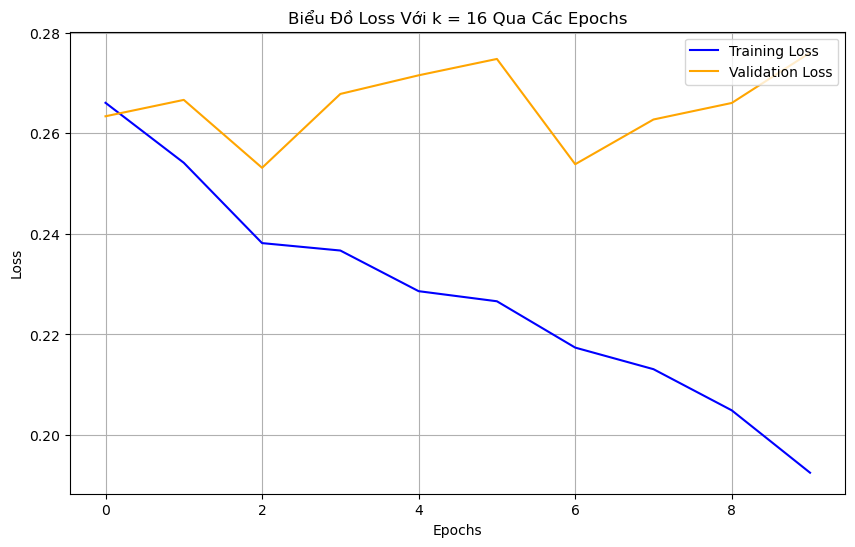

In [50]:
# Kiểm tra xem có dữ liệu `val_loss` không
has_val_loss = 'val_loss' in history_16.history

# Vẽ biểu đồ loss cho k = 16
plt.figure(figsize=(10, 6))
plt.plot(history_16.history['loss'], label='Training Loss', color='blue')
if has_val_loss:
    plt.plot(history_16.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Biểu Đồ Loss Với k = 16 Qua Các Epochs')
plt.legend(loc='upper right')  # Thêm chú thích
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

def micro_metrics(y_true, y_pred):
  # Calculate micro averages
  micro_precision, micro_recall, micro_f1, _ = precision_recall_fscore_support(
      y_true, y_pred.argmax(axis=1), average='micro'
  )
    
  # Macro averages
  macro_precision, macro_recall, macro_f1, _ = precision_recall_fscore_support(
      y_true, y_pred.argmax(axis=1), average='macro'
  )
  return {
      'micro_precision': micro_precision,
      'micro_recall': micro_recall,
      'micro_f1': micro_f1,
      'macro_precision': macro_precision,
      'macro_recall': macro_recall,
      'macro_f1': macro_f1
  }

In [ ]:
from tabulate import tabulate
micro_results = micro_metrics(y_test, y_pred)
# Prepare table data
table_data = [
  ["Micro Precision", micro_results['micro_precision']],
  ["Micro Recall", micro_results['micro_recall']],
  ["Micro F1-score", micro_results['micro_f1']],
  ["Macro Precision", micro_results['macro_precision']],
  ["Macro Recall", micro_results['macro_recall']],
  ["Macro F1-score", micro_results['macro_f1']],
]

# Print the table using tabulate
print(tabulate(table_data, headers=["Metric", "Score"]))

# Chạy qua các mốc k

In [57]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support
from tabulate import tabulate
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time

# Hàm để chạy mô hình với k đặc trưng
def run_model(k, X, X_test, y, y_test):
    # Chọn k đặc trưng tốt nhất
    selected_features_indices = sorted_features_indices[:k]
    selected_X = X[:,:,selected_features_indices]
    selected_X_test = X_test[:,:,selected_features_indices]

    # Khởi tạo mô hình
    model = keras.Sequential()

    # Thêm các lớp của mô hình
    model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(20, k, 1), padding='same'))
    model.add(layers.Conv2D(32, (5, 5), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(layers.Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(5, activation='softmax'))

    # Biên dịch mô hình
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Bắt đầu đo thời gian huấn luyện
    start_time = time.time()

    # Huấn luyện mô hình
    history = model.fit(selected_X, y, epochs=10, batch_size=16, verbose=0)

    # Kết thúc đo thời gian huấn luyện
    end_time = time.time()
    training_time = end_time - start_time

    # Đánh giá mô hình trên tập kiểm tra
    test_loss, test_accuracy = model.evaluate(selected_X_test, y_test, verbose=0)
    print(f"Độ chính xác trên tập kiểm tra với {k} đặc trưng:", test_accuracy)

    # Dự đoán các nhãn trên tập kiểm tra
    y_pred = model.predict(selected_X_test)

    # Chuyển đổi dự đoán thành nhãn dự đoán
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Hiển thị ma trận nhầm lẫn
    confusion = confusion_matrix(y_test, y_pred_classes)
    print("Ma trận nhầm lẫn:")
    print(confusion)

    # Hiển thị báo cáo phân loại
    class_report = classification_report(y_test, y_pred_classes, digits=4)
    print("Báo cáo phân loại:")
    print(class_report)

    # Tính toán micro và macro metrics
    micro_results = micro_metrics(y_test, y_pred)
    
    # Prepare table data
    table_data = [
      ["Micro Precision", micro_results['micro_precision']],
      ["Micro Recall", micro_results['micro_recall']],
      ["Micro F1-score", micro_results['micro_f1']],
      ["Macro Precision", micro_results['macro_precision']],
      ["Macro Recall", micro_results['macro_recall']],
      ["Macro F1-score", micro_results['macro_f1']],
    ]
    
    # Print the table using tabulate
    print(tabulate(table_data, headers=["Metric", "Score"]))

    # Trả về độ chính xác, kết quả micro metrics, ma trận nhầm lẫn, báo cáo phân loại, và thời gian huấn luyện
    return test_accuracy, micro_results, confusion, class_report, training_time, history

# Hàm tính toán micro và macro metrics
def micro_metrics(y_true, y_pred):
    # Calculate micro averages
    micro_precision, micro_recall, micro_f1, _ = precision_recall_fscore_support(
        y_true, y_pred.argmax(axis=1), average='micro'
    )

    # Macro averages
    macro_precision, macro_recall, macro_f1, _ = precision_recall_fscore_support(
        y_true, y_pred.argmax(axis=1), average='macro'
    )
    return {
        'micro_precision': micro_precision,
        'micro_recall': micro_recall,
        'micro_f1': micro_f1,
        'macro_precision': macro_precision,
        'macro_recall': macro_recall,
        'macro_f1': macro_f1
    }

# Các giá trị k cần thử nghiệm
k_values = [4, 8, 16, 32, 64, 96]

# Lưu trữ kết quả
results = []

# Thực hiện mô hình với từng giá trị k
for k in k_values:
    print(f"\nChạy mô hình với {k} đặc trưng...")
    accuracy, metrics, confusion, report, training_time, history = run_model(k, X, X_test, y, y_test)
    results.append((k, accuracy, metrics, confusion, report, training_time, history))

# So sánh kết quả và chọn k tối ưu
best_k_result = max(results, key=lambda x: x[1])
best_k = best_k_result[0]
print(f"\nGiá trị k tối ưu là: {best_k}")



Chạy mô hình với 4 đặc trưng...


C:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Độ chính xác trên tập kiểm tra với 4 đặc trưng: 0.7388728260993958
412/412 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Ma trận nhầm lẫn:
[[2840    2    0    0    0]
 [   1 1862    0    4  167]
 [  13  213   65    0 2517]
 [   2  360    0 1367   11]
 [   1  129   16    2 3594]]
Báo cáo phân loại:
              precision    recall  f1-score   support

           0     0.9940    0.9993    0.9967      2842
           1     0.7256    0.9154    0.8096      2034
           2     0.8025    0.0231    0.0450      2808
           3     0.9956    0.7856    0.8783      1740
           4     0.5715    0.9604    0.7166      3742

    accuracy                         0.7389     13166
   macro avg     0.8179    0.7368    0.6892     13166
weighted avg     0.7918    0.7389    0.6695     13166

Metric              Score
---------------  --------
Micro Precision  0.738873
Micro Recall     0.738873
Micro F1-score   0.738873
Macro Precision  0.817853
Macro Recall     0.736793
Macro F1-score   0.689212

Chạy mô hình với

C:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Độ chính xác trên tập kiểm tra với 8 đặc trưng: 0.7397083640098572
412/412 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
Ma trận nhầm lẫn:
[[2842    0    0    0    0]
 [   1 1863    5    0  165]
 [   0  157  126    0 2525]
 [   4  413    0 1310   13]
 [   0  110   34    0 3598]]
Báo cáo phân loại:
              precision    recall  f1-score   support

           0     0.9982    1.0000    0.9991      2842
           1     0.7326    0.9159    0.8141      2034
           2     0.7636    0.0449    0.0848      2808
           3     1.0000    0.7529    0.8590      1740
           4     0.5710    0.9615    0.7165      3742

    accuracy                         0.7397     13166
   macro avg     0.8131    0.7350    0.6947     13166
weighted avg     0.7860    0.7397    0.6767     13166

Metric              Score
---------------  --------
Micro Precision  0.739708
Micro Recall     0.739708
Micro F1-score   0.739708
Macro Precision  0.8131
Macro Recall     0.735038
Macro F1-score   0.694698

Chạy mô hình với 1

C:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Độ chính xác trên tập kiểm tra với 16 đặc trưng: 0.9115145206451416
412/412 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step
Ma trận nhầm lẫn:
[[2842    0    0    0    0]
 [   0 1979   14    1   40]
 [   0   36 2633    3  136]
 [   0  431    9 1295    5]
 [   0   39  449    2 3252]]
Báo cáo phân loại:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      2842
           1     0.7964    0.9730    0.8759      2034
           2     0.8480    0.9377    0.8906      2808
           3     0.9954    0.7443    0.8517      1740
           4     0.9473    0.8691    0.9065      3742

    accuracy                         0.9115     13166
   macro avg     0.9174    0.9048    0.9049     13166
weighted avg     0.9205    0.9115    0.9113     13166

Metric              Score
---------------  --------
Micro Precision  0.911515
Micro Recall     0.911515
Micro F1-score   0.911515
Macro Precision  0.917406
Macro Recall     0.904789
Macro F1-score   0.904922

Chạy mô hình vớ

C:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Độ chính xác trên tập kiểm tra với 32 đặc trưng: 0.9245784878730774
412/412 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step
Ma trận nhầm lẫn:
[[2842    0    0    0    0]
 [   0 1974   22    8   30]
 [   0   11 2679    1  117]
 [   0  335   15 1381    9]
 [   0   26  417    2 3297]]
Báo cáo phân loại:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      2842
           1     0.8414    0.9705    0.9014      2034
           2     0.8551    0.9541    0.9019      2808
           3     0.9921    0.7937    0.8819      1740
           4     0.9548    0.8811    0.9165      3742

    accuracy                         0.9246     13166
   macro avg     0.9287    0.9199    0.9203     13166
weighted avg     0.9307    0.9246    0.9245     13166

Metric              Score
---------------  --------
Micro Precision  0.924578
Micro Recall     0.924578
Micro F1-score   0.924578
Macro Precision  0.928689
Macro Recall     0.919864
Macro F1-score   0.920315

Chạy mô hình v

C:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Độ chính xác trên tập kiểm tra với 64 đặc trưng: 0.9176667332649231
412/412 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step
Ma trận nhầm lẫn:
[[2842    0    0    0    0]
 [   1 1918   22   52   41]
 [   0    4 2590    0  214]
 [   1  307   15 1407   10]
 [   1   25  391    0 3325]]
Báo cáo phân loại:
              precision    recall  f1-score   support

           0     0.9989    1.0000    0.9995      2842
           1     0.8509    0.9430    0.8946      2034
           2     0.8582    0.9224    0.8891      2808
           3     0.9644    0.8086    0.8796      1740
           4     0.9262    0.8886    0.9070      3742

    accuracy                         0.9177     13166
   macro avg     0.9197    0.9125    0.9140     13166
weighted avg     0.9208    0.9177    0.9176     13166

Metric              Score
---------------  --------
Micro Precision  0.917667
Micro Recall     0.917667
Micro F1-score   0.917667
Macro Precision  0.919721
Macro Recall     0.912503
Macro F1-score   0.913963

Chạy mô hình 

C:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Độ chính xác trên tập kiểm tra với 96 đặc trưng: 0.914172887802124
412/412 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step
Ma trận nhầm lẫn:
[[2842    0    0    0    0]
 [   0 1992    4    1   37]
 [   0   43 2449    0  316]
 [   0  384    9 1329   18]
 [   0   40  277    1 3424]]
Báo cáo phân loại:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      2842
           1     0.8101    0.9794    0.8867      2034
           2     0.8941    0.8722    0.8830      2808
           3     0.9985    0.7638    0.8655      1740
           4     0.9022    0.9150    0.9086      3742

    accuracy                         0.9142     13166
   macro avg     0.9210    0.9061    0.9088     13166
weighted avg     0.9201    0.9142    0.9138     13166

Metric              Score
---------------  --------
Micro Precision  0.914173
Micro Recall     0.914173
Micro F1-score   0.914173
Macro Precision  0.920989
Macro Recall     0.906063
Macro F1-score   0.908763

Giá trị k tối 

In [63]:
# Tạo bảng kết quả
table_results = []

# Duyệt qua kết quả và chuẩn bị dữ liệu cho bảng
for k, accuracy, _, _, _, training_time, _ in results:
    table_results.append([k, accuracy, training_time])

# In bảng kết quả
headers = ["k", "Accuracy", "Training Time (s)"]
print("\nBảng Kết Quả:")
print(tabulate(table_results, headers=headers, tablefmt="pretty"))


Bảng Kết Quả:
+----+--------------------+--------------------+
| k  |      Accuracy      | Training Time (s)  |
+----+--------------------+--------------------+
| 4  | 0.7388728260993958 | 63.12045979499817  |
| 8  | 0.7397083640098572 | 78.15709853172302  |
| 16 | 0.9115145206451416 | 113.92736673355103 |
| 32 | 0.9245784878730774 | 196.82797026634216 |
| 64 | 0.9176667332649231 | 373.72427797317505 |
| 96 | 0.914172887802124  | 571.2063534259796  |
+----+--------------------+--------------------+


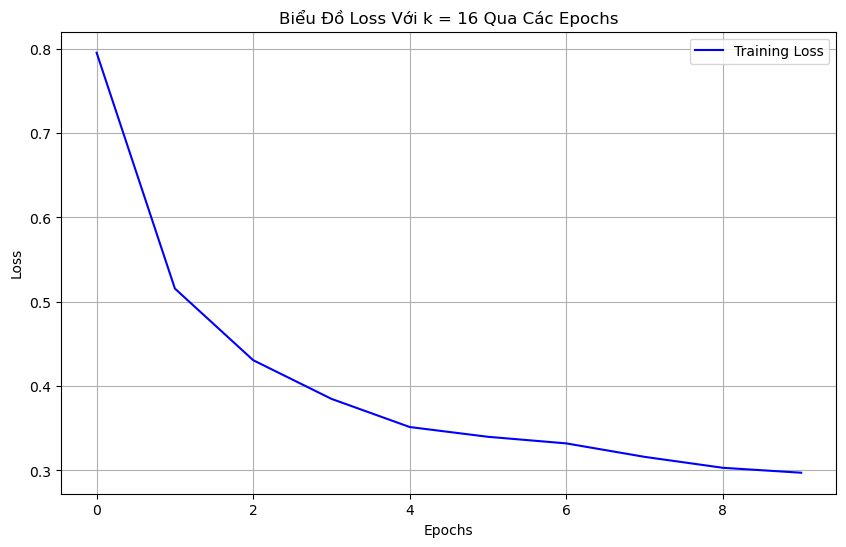

In [84]:
# Lọc kết quả cho k = 16
k_16_result = next(result for result in results if result[0] == 16)

# Lấy đối tượng `history` từ kết quả cho k = 16
history_k_16 = k_16_result[-1]

# Kiểm tra xem có dữ liệu `val_loss` không
has_val_loss = 'val_loss' in history_k_16.history

# Vẽ biểu đồ loss cho k = 16
plt.figure(figsize=(10, 6))
plt.plot(history_k_16.history['loss'], label='Training Loss', color='blue')
if has_val_loss:
    plt.plot(history_k_16.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Biểu Đồ Loss Với k = 16 Qua Các Epochs')
plt.legend(loc='upper right')  # Thêm chú thích
plt.grid(True)
plt.show()
